# Dynamic Resonances

This notebook shows how to obtain dynamic resonances from the discrete resonance spectrogram of a signal.

## 1. Imports

First we import the library of functions.

In [1]:
from utilities_store import *

## 2. Obtain spectrogram of the signal

First we obtain the spectrogram of the signal.

In [2]:
spectrogram, signal = get_spectrogram('data/input/flute-a4.wav', N = 300, step_size = 250, 
                                          power_threshold = 1e-9, amp_threshold = 1e-8)

Progress: 0.00%
Progress: 0.26%
Progress: 0.53%
Progress: 0.79%
Progress: 1.05%
Progress: 1.32%
Progress: 1.58%
Progress: 1.85%
Progress: 2.11%
Progress: 2.37%
Progress: 2.64%


/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/resonance.py:216: RuntimeWarning: overflow encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/resonance.py:216: RuntimeWarning: invalid value encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/resonance.py:266: RuntimeWarning: invalid value encountered in cdouble_scalars
  return replace(self, d=self.d * self.z ** offset)


Progress: 2.90%
Progress: 3.16%
Progress: 3.43%
Progress: 3.69%
Progress: 3.96%
Progress: 4.22%
Progress: 4.48%
Progress: 4.75%
Progress: 5.01%
Progress: 5.27%
Progress: 5.54%
Progress: 5.80%
Progress: 6.07%
Progress: 6.33%
Progress: 6.59%
Progress: 6.86%
Progress: 7.12%
Progress: 7.38%
Progress: 7.65%
Progress: 7.91%
Progress: 8.17%
Progress: 8.44%
Progress: 8.70%
Progress: 8.97%
Progress: 9.23%
Progress: 9.49%
Progress: 9.76%
Progress: 10.02%
Progress: 10.28%
Progress: 10.55%
Progress: 10.81%
Progress: 11.08%
Progress: 11.34%
Progress: 11.60%
Progress: 11.87%
Progress: 12.13%
Progress: 12.39%
Progress: 12.66%
Progress: 12.92%
Progress: 13.19%
Progress: 13.45%
Progress: 13.71%
Progress: 13.98%
Progress: 14.24%
Progress: 14.50%
Progress: 14.77%
Progress: 15.03%
Progress: 15.29%
Progress: 15.56%
Progress: 15.82%
Progress: 16.09%
Progress: 16.35%
Progress: 16.61%
Progress: 16.88%
Progress: 17.14%
Progress: 17.40%
Progress: 17.67%
Progress: 17.93%
Progress: 18.20%
Progress: 18.46%
Progres

/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:224: RuntimeWarning: overflow encountered in power
  Z = np.power(self.zs.reshape(-1, 1), exponent)
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:234: RuntimeWarning: overflow encountered in matmul
  d = np.divide(Z @ ps[1:].reshape(-1, 1),
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:234: RuntimeWarning: invalid value encountered in matmul
  d = np.divide(Z @ ps[1:].reshape(-1, 1),
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:235: RuntimeWarning: overflow encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:235: RuntimeWarning: invalid value encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:234: RuntimeWarning: invalid value encountered in divide
  d = np.divide(Z @ ps[1:].reshape(-1, 1),


Progress: 70.67%
Progress: 70.94%
Progress: 71.20%
Progress: 71.46%
Progress: 71.73%
Progress: 71.99%
Progress: 72.26%
Progress: 72.52%
Progress: 72.78%
Progress: 73.05%
Progress: 73.31%
Progress: 73.57%
Progress: 73.84%
Progress: 74.10%
Progress: 74.36%
Progress: 74.63%
Progress: 74.89%
Progress: 75.16%
Progress: 75.42%
Progress: 75.68%
Progress: 75.95%
Progress: 76.21%
Progress: 76.47%
Progress: 76.74%
Progress: 77.00%
Progress: 77.27%
Progress: 77.53%
Progress: 77.79%
Progress: 78.06%
Progress: 78.32%
Progress: 78.58%
Progress: 78.85%
Progress: 79.11%
Progress: 79.38%
Progress: 79.64%
Progress: 79.90%
Progress: 80.17%
Progress: 80.43%
Progress: 80.69%
Progress: 80.96%
Progress: 81.22%
Progress: 81.48%
Progress: 81.75%
Progress: 82.01%
Progress: 82.28%
Progress: 82.54%
Progress: 82.80%
Progress: 83.07%
Progress: 83.33%
Progress: 83.59%
Progress: 83.86%
Progress: 84.12%
Progress: 84.39%
Progress: 84.65%
Progress: 84.91%
Progress: 85.18%
Progress: 85.44%
Progress: 85.70%
Progress: 85.9

Plot the original resonance spectrogram.

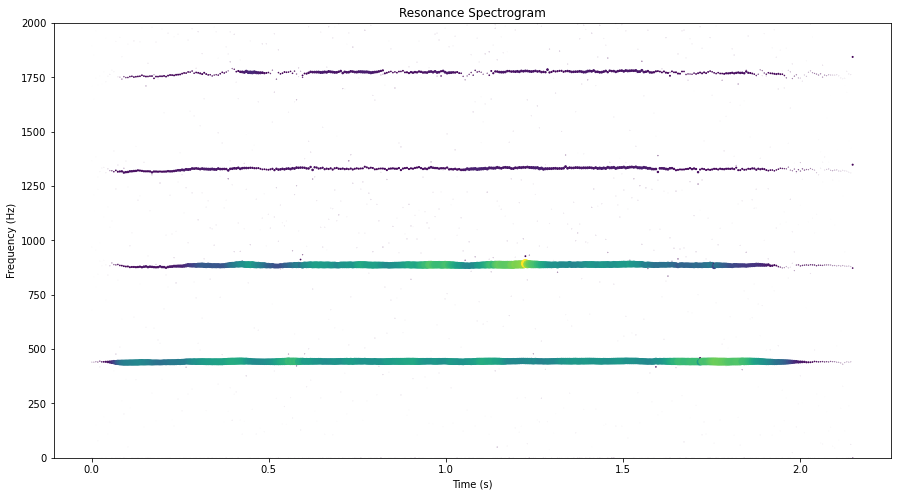

In [3]:
plot_spectrogram(spectrogram, max_freq = 2000, scale=100)

In [4]:
res_set = ResonanceSet(np.array([spectrogram]), np.array(spectrogram.onsets[0]))

# One resonance

fRes = res_set.elements[0][1].elements
candidateRes = res_set.elements[0][2].elements

# find a specific parameter
#res_set.elements[0][1].elements.d

#harmonic_mean_distance(res, candidates, forward, alpha=100, beta=1)
harmonic_mean_distance(fRes, candidateRes, True, alpha=100, beta=1)

#spectrogram.elements[0]

0.010417633215588053

## 3. Obtain the dynamic resonances

Next we obtain the dynamic resonances. The main parameter of this function is the distance measure. This parameter defines the formula used to calculate the distance (spectral similarity) between two resonances. We have developped six different distance measures:

    - Frequency distance.
    - Harmonic mean of the dk and wk coefficients.
    - Residue of the product of the resonances.
    - Residue of the product of the resonances weighted by power.
    - Residue of the product of the resonances multiplied by the spectra transference function.
    - Residue of the product of the resonances multiplied by the spectra transference function weighted by power.
    
In this example we use the Residue Power distance measure to obtain the dynamic resonances.

In [6]:
dyns = get_dynamic_resonances(spectrogram, min_overlap = 1e-15, overlap_type = "exponential", freq_ratio = 15, 
                              mode = 'forward', multiple_match = False, distance = 'residue_power')



Resonance(d=(-0.0005415061820675507-0.004141183519045796j), w=(-2761.589126149442+50.16407128511394j), z=(0.9991758651649989+0.06265137549772581j), N=250, sample_rate=44100)
Resonance(d=(0.0009549740435109062+0.005511359891303781j), w=(-2778.3876318829166+58.91166301938899j), z=(0.9993501371328793+0.06304447965468332j), N=250, sample_rate=44100)
Resonance(d=(-0.0005415061820675507+0.004141183519045796j), w=(2761.589126149442+50.16407128511394j), z=(0.9991758651649989-0.06265137549772581j), N=250, sample_rate=44100)
Resonance(d=(0.0009549740435109062-0.005511359891303781j), w=(2778.3876318829166+58.91166301938899j), z=(0.9993501371328793-0.06304447965468332j), N=250, sample_rate=44100)
Resonance(d=(0.0009549740435109062+0.005511359891303781j), w=(-2778.3876318829166+58.91166301938899j), z=(0.9993501371328793+0.06304447965468332j), N=250, sample_rate=44100)
Resonance(d=(-0.0009544519094006879-0.00732815132656203j), w=(-2766.281635109757+64.46441319252395j), z=(0.9994932469429779+0.062778

AttributeError: 'numpy.ndarray' object has no attribute 'd'

Plot the dynamic resonances:

A
Resonance(d=(-5.259494396433679e-06-4.422996475549876e-05j), w=(39967.789713571015-77.67595168734125j), z=(0.6155782147801447-0.7858415489686456j), N=250, sample_rate=44100)
--------------------
[ 6361.07129737 -6361.07129737  5727.14204742 ...   142.29596731
  -142.29596731    -0.        ]
--------------------
ResonanceSet(elements=array([Resonance(d=(-5.259494396433679e-06-4.422996475549876e-05j), w=(39967.789713571015-77.67595168734125j), z=(0.6155782147801447-0.7858415489686456j), N=250, sample_rate=44100),
       Resonance(d=(-5.259494396433679e-06+4.422996475549876e-05j), w=(-39967.789713571015-77.67595168734125j), z=(0.6155782147801447+0.7858415489686456j), N=250, sample_rate=44100),
       Resonance(d=(-3.9005625970780944e-05-8.125237912605841e-06j), w=(35984.694764490254-19.151208810651184j), z=(0.6848578006501531-0.7280807883809952j), N=250, sample_rate=44100),
       ...,
       Resonance(d=(-0.0015846151323797636-0.0006473664438364074j), w=(894.071931093009-2481.690028946

IndexError: invalid index to scalar variable.

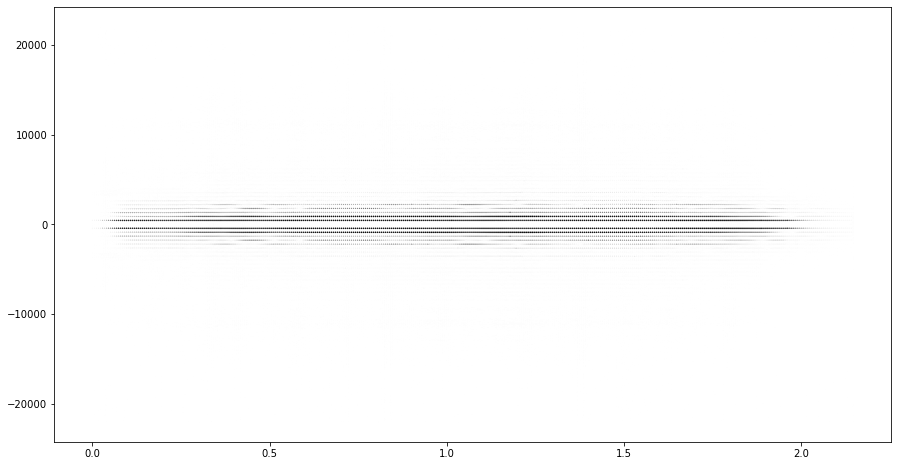

In [ ]:
#dyns.elements

plot_dynamic(spectrogram, spectrogram, max_freq = 1000, size = 'power')

## 4. Extend dynamic resonances

Dynamic resonances can be extended with "correcting" resonances that reduce the discontinuitis in the recontruction at the edge of the windows. There exist three methods to extend dynamic resonances:

    - Extension by amplitude correction in the time signal
    - Extension by phase correction in the time signal
    - Extension by decay coefficient. The dynamic resonance is extended with all the resonances in the candidates 
    range that point inwards (damping above center resonance, ramping below center resonance) if the dynamic resonance is 
    decreasing in frequency and vice versa. 

In [ ]:
new_dyns = extend_dynamic_res(spectrogram, dyns, step_size = 250, extension_type = 'amplitude',  ratio = 1.3)

NameError: name 'dyns' is not defined

Plot the extended dynamic resonances

In [ ]:
plot_dynamic(spectrogram, new_dyns, max_freq = 2000, size = 'power')